# ASK-Modulation

## Abbildung des Bitstrom auf Datensymbole

Im Folgenden wird die Modulation eines binären Datenstrom per $M$-ASK demonstriert. Zunächst wird der binäre Datenstrom $u[k]$ auf die zeit- und wertediskreten Symbole $d[i]$ abgebildet. Diese sind bei einer ASK reellwertig. Bei der Abbildung wird eine Gray-Codierung verwendet.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from Modulation.modulation import Modulation

# ---------------------------------------------------------------------------------
# parameter definition 

# cardinality of modulation scheme
M = 4
# number of information bits to be generated
N_info_bits = 64

# number of bits per ASK symbol
m = int(np.round(np.log2(M)))
# number of symbols obtained from information bits
N_symbols = N_info_bits // m
time_symbol = np.arange(N_symbols)

# ---------------------------------------------------------------------------------
# ASK alphabet
ask = Modulation(m, coding_type='gray',modulation_type='ASK')


In [2]:
# generate information bits u[k]
u = np.random.randint(0,2,N_info_bits)

# map bits to data symbols
d_ask_norm = ask.modulate(u)
d_ask = d_ask_norm * np.sqrt(ask.E)

(np.float64(0.0), np.float64(32.0), np.float64(-3.5), np.float64(4.0))

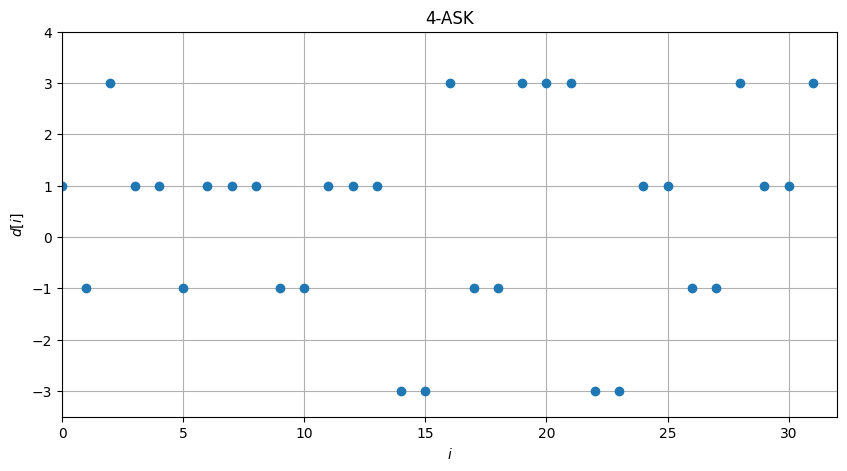

In [3]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(time_symbol, d_ask, marker='o',linestyle='none')
plt.xlabel('$i$')
plt.ylabel('$d[i]$')
plt.title('%g-ASK' %(M))
plt.grid(True)
plt.axis([0, 32, -3.5, 4])

## Sendefilter 

Die Datensymbolfolge $d[k]$ muss nun in ein analoges, d.h. zeit- und wertekontinuierliches Signal $x(t)$ überführt werden. Dazu dient das Sendefilter, mit dessen Impulsantwort $g_S(t)$ die Datenfolge zu falten ist. Wir erhalten das analoge Signal

\begin{equation}
    x(t) = T_s \cdot d[i] \ast g_S(t) = T_s \cdot \sum_i d[i] \cdot g_S(t-iT_s) \; .
\end{equation}

Zusammen mit dem Empfangsfilter $g_E(t)$ ist die 1. Nyquist-Bedingung 

\begin{equation}
    T_s \cdot g(i T_s) = 
    \begin{cases}
        1 & \text{ für } i = 0 \\
        0 & \text{ für } i \neq 0 
    \end{cases}
    \qquad \text{mit} \qquad
    g(t) = g_E(t) \ast g_S(t)
\end{equation}

zu erfüllen. Wichtig ist, dass die Gesamtimpulsantwort $g(t)$ die 1. Nyquist-Bedingung erfüllen muss, nicht aber die separaten Impulsantworten von Sende- und Empfangsfilter. Ein einfaches Beispiel wäre ein Rechteckimpuls der Dauter $T_{\mathrm{s}}/2$ für Sende- und Empfangsfilter. Die Faltung beider Rechteckimpulse ergibt ein Dreieck der Dauer $T_{\mathrm{s}}$. Allerdings hat das Spektrum eine si$^2$-Charakteristik und fällt nur sehr langsam ab. Daher ist es für Funkübertragungssysteme nicht geeignet.

Auch der ideale Tiefpass mit si-förmiger Impulsantwort und rechteckförmicger Übertragungsfunktion erfüllt die erste Nyquist-Bedingung. Er ist wie auch das obige Rechteckfilter in der Praxis aufgrund der unendlich steilen Flanken nicht realisierbar. Allerdings erfüllen auch alle Filter, deren Impulsantwort aus einer Fensterung des idealen Tiefpasses hervorgehen, die 1. Nyquist-Bedingung. In der Praxis werden häufig Wurzel-Kosinus-Rolloff-Filter mit der Impulsantwort

\begin{equation}
    g_{\mathrm{RRC}}(t) = \frac{4 r \frac{t}{T_S} \cos \left(\pi (1+r) \frac{t}{T_S} \right) + \sin \left( \pi (1-r) \frac{t}{T_S} \right)}{\left( 1- \left(4r \frac{t}{T_S} \right)^2 \right) \pi t}
\end{equation}

dem Roll-Off-Faktor $r$ und der Nyquist-Kreisfrequenz $\omega_{\mathrm{N}}=\frac{\pi}{T_S}$ eingesetzt. Die Übertragungsfunktion lautet

\begin{equation}
    G_{\mathrm{RRC}}(j \omega) = 
    \begin{cases} 
        1 & \text{für } \frac{|\omega|}{\omega_{\mathrm{N}}} \leq 1-r \\
        \cos \left( \frac{\pi}{4r} \left( \frac{|\omega|}{\omega_{\mathrm{N}}} - (1-r) \right) \right)
        & \text{für } 1 - r \leq \frac{|\omega|}{\omega_{\mathrm{N}}} \leq 1+r \\
        0 & \text{für } \frac{|\omega|}{\omega_{\mathrm{N}}} \geq 1+r 
    \end{cases}
\end{equation}

Das Empfangsfilter als Matched-Filter ist ebenfalls ein Wurzelkosinus-Rolloff-Filter. Beide zusammen resultieren in einer Kosinus-Rolloff-Charakteristik mit der Gesamtimpulsantwort

\begin{equation}
    g_{\mathrm{RC}}(t) = \frac{1}{T_S} \cdot \frac{\sin(\pi t/Ts)}{\pi t/T_S} \cdot \frac{\cos(r \pi t/T_S)}{1-(2rt/T_S)^2}
\end{equation}

und der Übertragungsfunktion

\begin{equation}
    G_{\mathrm{RC}}(j \omega) = 
    \begin{cases} 
        1 & \text{für } \frac{|\omega|}{\omega_{\mathrm{N}}} \leq 1-r \\
        \frac{1}{2} \cdot \left[ 1 + \cos \left( \frac{\pi}{2r} \left( \frac{|\omega|}{\omega_{\mathrm{N}}} - (1-r) \right) \right) \right]
        & \text{für } 1 - r \leq \frac{|\omega|}{\omega_{\mathrm{N}}} \leq 1+r \\
        0 & \text{für } \frac{|\omega|}{\omega_{\mathrm{N}}} \geq 1+r  \; .
    \end{cases}
\end{equation}

Die Verläufe von Rechteck- und Dreieckimpulsantwort sowie von Kosinus- und Wurzel-Kosinus-Rolloff-Filtern im unteren Bild verdeutlichen, dass die 1. Nyquist-Bedingung für das Wurzelkosinus-Rolloff-Filter allein nicht efüllt ist. Nur das Gesamtfilter mit der Impulsantwort $g(t)=g_{\mathrm{RC}}(t)$ erfüllt sie. Die dreiecksförmige Gesamtimpulsantwort bei rechteckigen Sende- udn Empfangsfilter-Impulsantworten erfüllt ebenfalls die 1. Nyquist-Bedingung.  


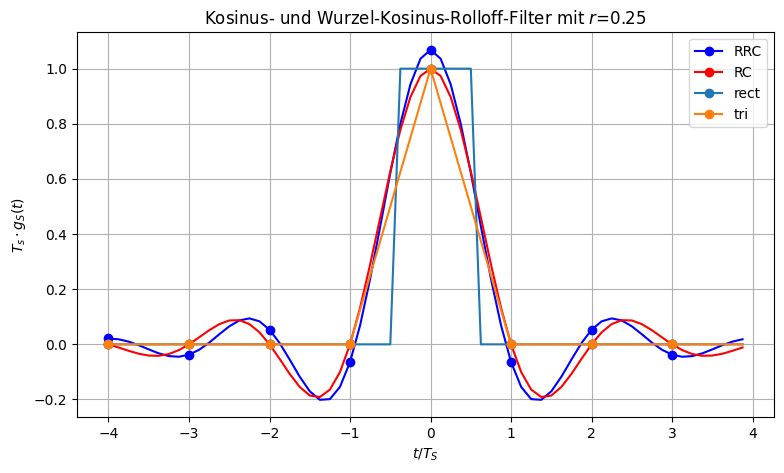

In [4]:
# symbol duration in seconds
Ts = 1e-6
# oversampling factor
w = 8
# sampling rate in Hz
fa = w / Ts
# length of filter impulse response in samples
N_rc = 8*w

# roll-off factor of Root-Raised-Cosine filter
r = 0.25
_,g_rrc   = ask.generate_g_rrc(N_rc,r,Ts,fa)
time,g_rc = ask.generate_g_rc(N_rc,r,Ts,fa)

# rectangular filter
_,g_rect = ask.generate_g_rect(N_rc,Ts,fa)

# triangular filter
_,g_tri = ask.generate_g_tri(N_rc,Ts*2,fa)

time = time / Ts

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(time,g_rrc*Ts, 'b-o', markevery=(w), label='RRC')
ax.plot(time,g_rc*Ts, 'r-o', markevery=(w), label='RC')
ax.plot(time,g_rect*Ts, '-o', markevery=(w), label='rect')
ax.plot(time,g_tri*Ts*2, '-o', markevery=(w), label='tri')
plt.xlabel('$t/T_S$')
plt.ylabel('$T_s \\cdot g_S(t)$')
plt.title('Kosinus- und Wurzel-Kosinus-Rolloff-Filter mit $r$=%1.2f' %(r))
plt.grid(True)
plt.legend()


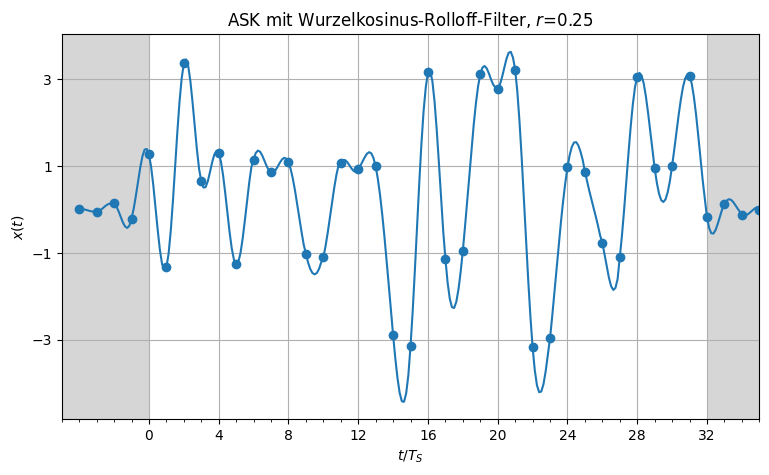

In [5]:
# oversampling data symbols by inserting w zeros 
x = np.append(np.reshape(d_ask,(N_symbols,1)),np.zeros((N_symbols,w-1)),axis=1)
x = np.reshape(x,(N_symbols*w,1))

time = (np.arange(N_symbols*w+N_rc-1)-N_rc/2) / fa
x_rrc = np.convolve(x.flatten(),g_rrc)*Ts

fig = plt.figure(figsize=(9,5))
from matplotlib.ticker import AutoMinorLocator
ax = fig.add_subplot(111)
ax.plot(time/Ts,x_rrc, marker='o',markevery=w)
plt.xlabel('$t/T_S$')
plt.ylabel('$x(t)$')
plt.title('ASK mit Wurzelkosinus-Rolloff-Filter, $r$=%1.2f' %(r))
plt.grid(True)
plt.xticks(np.arange(0,33,4))
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.yticks(ask.constellation)
plt.xlim(-5,35)
plt.axvspan(-5, 0, facecolor='0.2', alpha=0.2)
plt.axvspan(32, 35, facecolor='0.2', alpha=0.2)

Im obigen Bild ist ein exemplarischer Verlauf der (komplexen) Einhüllenden $x(t)$ dargestellt, wobei die Marker die idealen Abtastzeitpunkte markieren. Man erkennt, dass an den idealen Abtastzeitpunkten nicht exakt die gewünschten Symbolwerte $\{ \pm 3, \pm 1\}$ auftreten, sondern leicht größere oder kleinere Werte. Dies liegt an den Intersymbolinterferenzen, da das Wurzel-Kosinus-Rolloff-Filter nicht die erste Nyquist-Bedingung erfüllt. Die Ein- und Ausschwingvorgänge am Anfang ($t<0$) und Ende ($t>32T_S$) des Signalverlaufs sind zu vernachlässigen.

Demgegenüber zeigt das untere Bild, dass bei einem Kosinus-Rolloff-Filter zu den idealen Abtastzeitpunkten die erwarteten Symbolwerte abzulesen sind und die 1. Nyquist-Bedingung erfüllt wird.

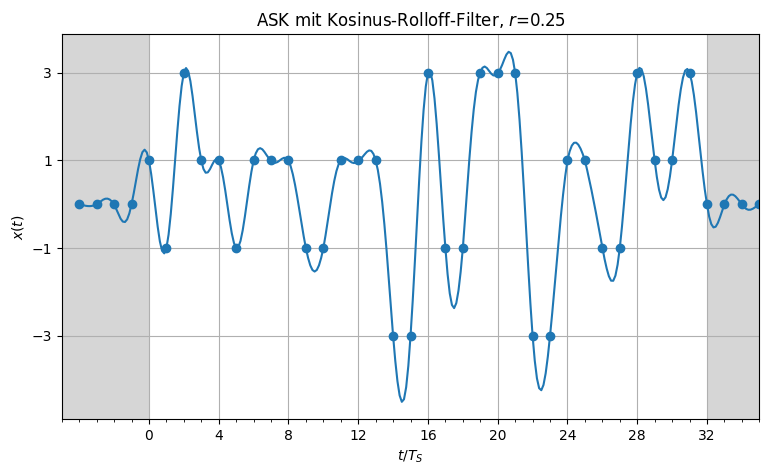

In [6]:
x_rc = np.convolve(x.flatten(),g_rc)*Ts

fig = plt.figure(figsize=(9,5))
from matplotlib.ticker import AutoMinorLocator
ax = fig.add_subplot(111)
ax.plot(time/Ts,x_rc, marker='o',markevery=w)
plt.xlabel('$t/T_S$')
plt.ylabel('$x(t)$')
plt.title('ASK mit Kosinus-Rolloff-Filter, $r$=%1.2f' %(r))
plt.grid(True)
plt.xticks(np.arange(0,33,4))
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.yticks(ask.constellation)
plt.xlim(-5,35)
plt.axvspan(-5, 0, facecolor='0.2', alpha=0.2)
plt.axvspan(32, 35, facecolor='0.2', alpha=0.2)

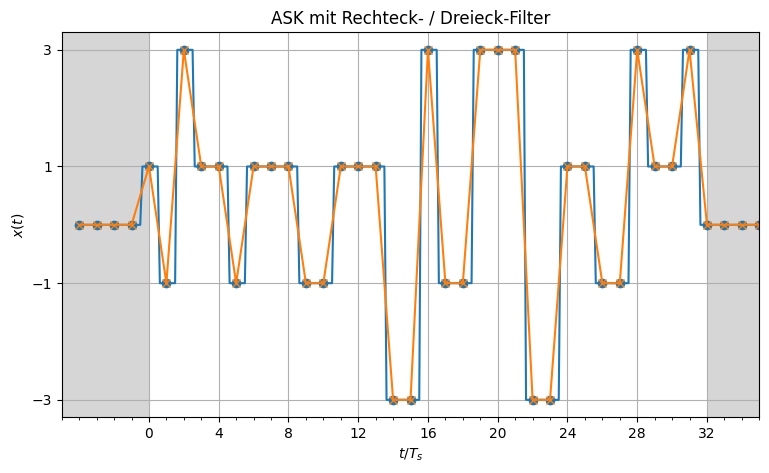

In [7]:
x_rect = np.convolve(x.flatten(),g_rect)*Ts
x_tri = np.convolve(x.flatten(),g_tri)*2*Ts

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(time/Ts,x_rect, marker='o',markevery=(w),label='rect')
ax.plot(time/Ts,x_tri, marker='x',markevery=(w),label='tri')
plt.xlabel('$t/T_s$')
plt.ylabel('$x(t)$')
plt.title('ASK mit Rechteck- / Dreieck-Filter')
plt.grid(True)
plt.xticks(np.arange(0,33,4))
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.yticks(ask.constellation)
plt.xlim(-5,35)
plt.axvspan(-5, 0, facecolor='0.2', alpha=0.2)
plt.axvspan(32, 35, facecolor='0.2', alpha=0.2)

## Augendiagramm

Das Augendiagramm ist ein graphisches Hilfsmittel, um die Übertragungsqualität zu beurteilen. Um es anzuzeigen wird das Signal $x(t)$ in Abschnitte der Dauer $T_S$ unterteilt und diese werden in einem Diagramm übereinander gezeichnet. Für das Kosinus-Rolloff-Filter erhalten wird das untere Bild. Es ist deutlich zu erkennen, dass am idealen Abtastzeitpunkt die Symbolwerte der 4-ASK abzulesen sind. Damit ist die vertikale Augenöffnung ideal und die 1. Nyquist-Bedingung erfüllt. Die horiziontale Augenöffnung ist hingegen nicht maximal, sondern auf etwa $0.37\ T_S$ begrenzt, was in der Wahl des Rolloff-Faktors von $r=0.25$ begründet ist.

(np.float64(-0.5), np.float64(0.5), np.float64(-4.0), np.float64(4.0))

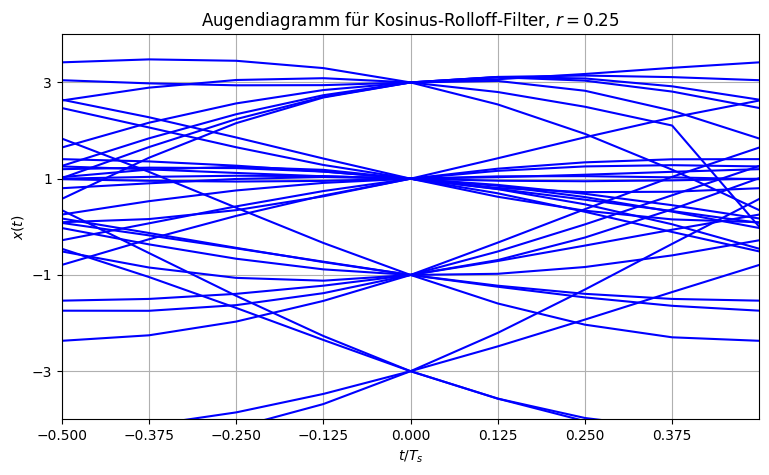

In [8]:
start = int((len(g_rc)-w)/2) 
stop  = start + N_symbols * w
eye_rc = np.reshape(x_rc[start:stop],(w,N_symbols),order='f')
eye_rrc = np.reshape(x_rrc[start:stop],(w,N_symbols),order='f')
eye_tri = np.reshape(x_tri[start:stop],(w,N_symbols),order='f')

eye_rc = np.append(eye_rc, np.zeros((1,N_symbols),dtype=float),axis=0)
eye_rrc = np.append(eye_rrc, np.zeros((1,N_symbols),dtype=float),axis=0)
eye_tri = np.append(eye_tri, np.zeros((1,N_symbols),dtype=float),axis=0)
for run in range(N_symbols-1):
    eye_rc [-1,run] = eye_rc[0,run+1]
    eye_rrc [-1,run] = eye_rrc[0,run+1]
    eye_tri [-1,run] = eye_tri[0,run+1]

eye_time = np.arange(-Ts/2,Ts/2 + 0.5/fa,1/fa) / Ts

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(eye_time,eye_rc, 'b-')
plt.xlabel('$t/T_s$')
plt.ylabel('$x(t)$')
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r))
plt.grid(True)
plt.xticks(np.arange(-0.5,0.5,1/w))
plt.yticks(ask.constellation)
plt.axis([-0.5, 0.5, -4.0, 4.0])

Das Wurzel-Kosinus-Rolloff-Filter erfüllt wie bereits erwähnt nicht die 1. Nyquist-Bedingung. Dies ist am unteren Augendiagramm zu erkennen. Die vertikale Augenöffnung ist gegenüber der obigen Abbildung deutlich reduziert, die Symbolwerte der ASK können nicht störungsfrei abgelesen werden.

([<matplotlib.axis.YTick at 0x7fca19fe3250>,
 [Text(0, -3, '−3'), Text(0, -1, '−1'), Text(0, 1, '1'), Text(0, 3, '3')])

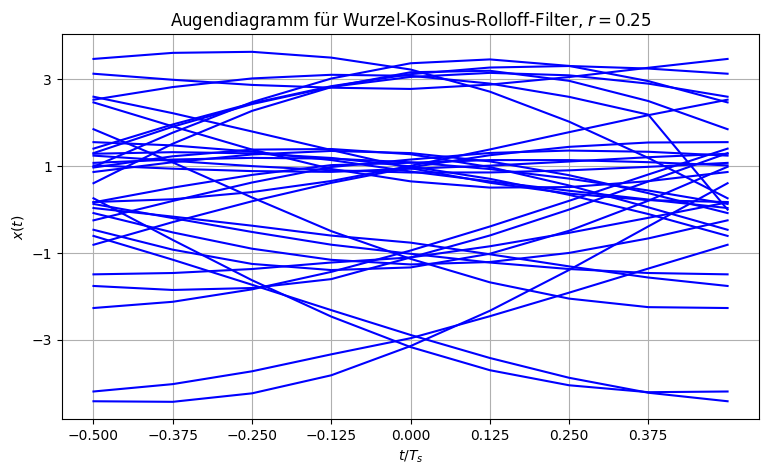

In [9]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(eye_time,eye_rrc, 'b-')
plt.xlabel('$t/T_s$')
plt.ylabel('$x(t)$')
plt.title('Augendiagramm für Wurzel-Kosinus-Rolloff-Filter, $r=$%1.2f' %(r))
plt.grid(True)
plt.xticks(np.arange(-0.5,0.5,1/w))
plt.yticks(ask.constellation)

Das Augendiagramm des Rechteckfilters für Sender und Empfänger führt zu einer dreieckförmigen Gesamtimpulsantwort, deren Augendiagramm in nächten Plot dargestellt ist. Auch es erfüllt die 1. Nyquist-Bedingung, wie an den vertikalen Augenöffnungen zu erkennen ist. Die horizontale Augenöffnung ist ebenfalls nicht maximal.

([<matplotlib.axis.YTick at 0x7fca195becb0>,
 [Text(0, -3, '−3'), Text(0, -1, '−1'), Text(0, 1, '1'), Text(0, 3, '3')])

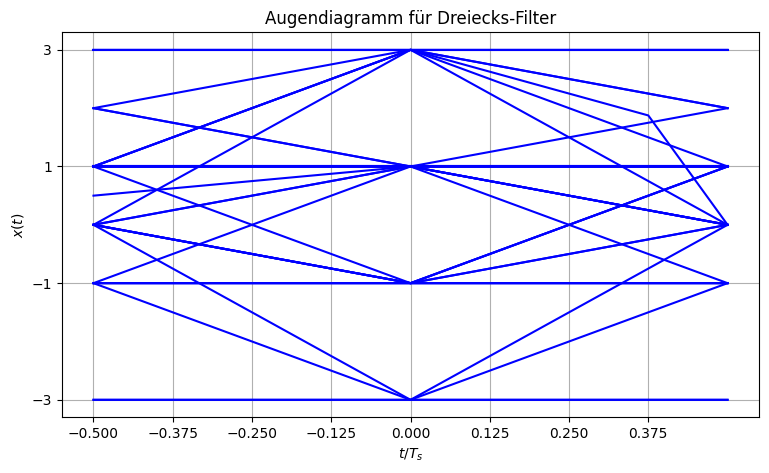

In [10]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(eye_time,eye_tri, 'b-')
plt.xlabel('$t/T_s$')
plt.ylabel('$x(t)$')
plt.title('Augendiagramm für Dreiecks-Filter')
plt.grid(True)
plt.xticks(np.arange(-0.5,0.5,1/w))
plt.yticks(ask.constellation)

## Verschiebung in das Übertragungsband

Zur Verschiebung in das Übertragungsband ist das Basisbandsignal $x(t)$ mit der Trägerschwingung zu multiplizieren, $x(t)$ moduliert sozusagen die Trägerschwingung. Mathematisch erhalten wir

\begin{equation}
    x_{\mathrm{ASK}}(t) = \mathrm{Re} \{ x(t) \cdot e^{j \omega_0t} \} = x(t) \cdot \cos(\omega_0t) \; .
\end{equation}  

Das unten folgende Bild veranschaulicht das sich ergebende Zeitsignal. Um die hochfrequente Trägerschwingung mit $f_0=5$ MHz zu visualisieren, wurde die Überabtastung um den Faktor $w_2$ erhöht. Das blaue Zeitsignal wird durch die rot dargestellt Einhüllende nach oben und nach unten begrenzt.

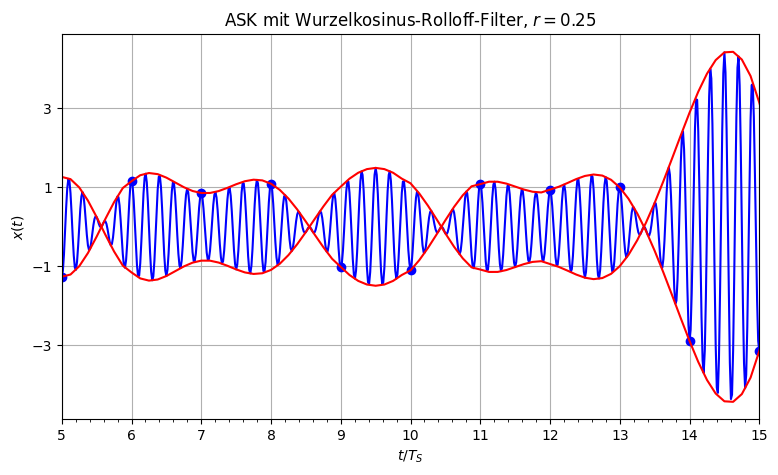

In [11]:
# carrier frequency in Hz
f0 = 5e6
# additional oversampling factor
w2 = 8
# sampling rate in Hz
fa2 = fa * w2
# length of filter impulse response in samples
N_rc2 = N_rc*w2

time2,x_rrc2 = ask.impulse_shaping(d_ask, 'rrc', N_rc2, Ts, fa2, r)
x_rrc2 = x_rrc2 * np.cos(2 * np.pi * f0 * time2)

fig = plt.figure(figsize=(9,5))
from matplotlib.ticker import AutoMinorLocator
ax = fig.add_subplot(111)
ax.plot(time2/Ts,x_rrc2, 'b-o',markevery=w*w2)
ax.plot(time/Ts,x_rrc, 'r-',markevery=w)
ax.plot(time/Ts,-x_rrc, 'r-',markevery=w)
plt.xlabel('$t/T_S$')
plt.ylabel('$x(t)$')
plt.title('ASK mit Wurzelkosinus-Rolloff-Filter, $r=$%1.2f' %(r))
plt.grid(True)
plt.xticks(np.arange(0,33,1))
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.yticks(ask.constellation)
plt.xlim(5,15)
plt.axvspan(-5, 0, facecolor='0.2', alpha=0.2)
plt.axvspan(32, 35, facecolor='0.2', alpha=0.2)

## Leistungsdichtespektrum 

Da das modulierte Signal ein stochastisches Signal ist, kann nicht einfach die Fourier-Transformierte zur Bestimmung des Spektrums berechnet werden. Vielmehr wird das Leistungdichtespektrum verwendet, das die mittlere Verteilung der Leistung über der Frequenz angibt. Es berechnet sich nach dem Theorem von Wiener und Khintchine aus der Fourier-Transformierten der Autokorrelationsfunktion. Für mittelwertfreie, identisch verteilte und statistisch unabhängige Datensymbole (i.i.d.) lautet die spektrale Leistungsdichte

\begin{equation}
    \Phi_{{\cal XX}}(j \omega) = \sigma_D^2 \cdot T_S \cdot |G_S(j \omega)|^2
\end{equation}

Es hängt also bis auf eine Skalierung mit $\sigma_D^2 \cdot T_S$ nur vom Betragsquadrat der Übertragungsfunktion des Sendefilters ab.

Für eine akzeptable Auflösung im Frequenzbereich benötigen wir deutlich längere Sequenzen. Im folgenden Code-Segment wird daher ein längeres ASK-Signal erzeugt und dann das Leistungsdichtespektrum mit Hilfe der Welch-Methode geschätzt. 

In [12]:
from scipy import signal

# number of ASK symbols
N = 1000

# averaging for power density spectrum
Npsd = 10

# generate information bits
u = np.random.randint(0,2,N*m)

# map bit sequence to ASK symbols
d = ask.modulate(u)

# generate filtered baseband signals
time, x_rc = ask.impulse_shaping(d, 'rrc', N_rc, Ts, fa, r)
_, x_tri = ask.impulse_shaping(d, 'rect', N_rc, Ts, fa, r)

# estimation of power spectral density with Welch method
f, psd_rc  = signal.welch(x_rc, fs=fa, nperseg=N*w/Npsd, return_onesided=False, scaling='spectrum',axis=0)
_, psd_tri = signal.welch(x_tri, fs=fa, nperseg=N*w/Npsd, return_onesided=False, scaling='spectrum',axis=0)

# rearrange positive and negative frequencies
f = np.fft.fftshift(f)
psd_rc  = np.fft.fftshift(psd_rc) * N_rc
psd_tri = np.fft.fftshift(psd_tri) * N_rc

# analytical solution of power spectral density equals squared magnitude of transfer function of root-raised-cosine transmit filter
# squared magnitude of root-raised-cosine characteristic equals raised-cosine characteristic
# solution normalized to maximum value of 1 (divided by T_s sigma_D^2)
G_RC = 0.5 * (1 + np.cos(np.pi/(2*r)*(np.abs(f)*2*Ts-(1-r))))
ptr = np.argwhere(np.abs(f)*2*Ts<1-r)
G_RC[ptr.flatten()] = 1.0
ptr = np.argwhere(np.abs(f)*2*Ts>1+r)
G_RC[ptr.flatten()] = 0.0

(np.float64(-2.0), np.float64(2.0), np.float64(1e-06), np.float64(2.0))

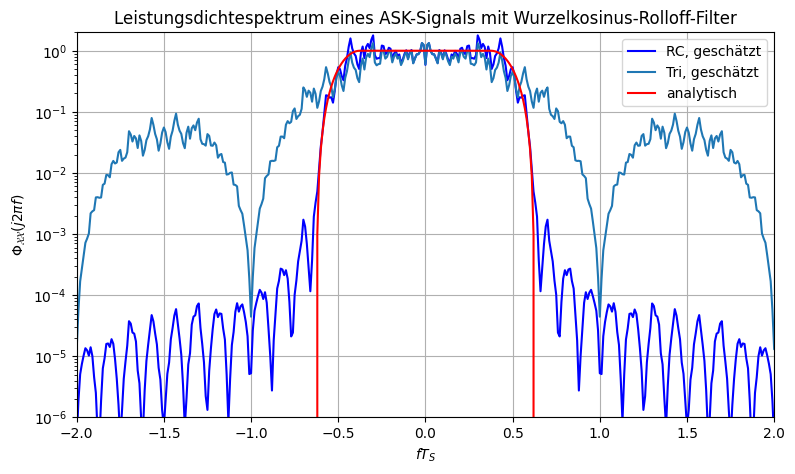

In [13]:
fig_psd = plt.figure(figsize=(9,5))
ax = fig_psd.add_subplot(111)
ax.semilogy(f*Ts, psd_rc,'b-',label='RC, geschätzt')
ax.semilogy(f*Ts, psd_tri,'-',label='Tri, geschätzt')
ax.semilogy(f*Ts, G_RC,'r-',label='analytisch')
plt.title('Leistungsdichtespektrum eines ASK-Signals mit Wurzelkosinus-Rolloff-Filter')
plt.xlabel('$f T_S$')
plt.ylabel('$\Phi_{\cal XX}(j 2 \pi f)$')
plt.legend()
plt.grid(True)
plt.axis([-2, 2, 1e-6, 2])

Dem obigen Bild ist zu entnehmen, dass die analytische Berechnung für das Kosinus-Rolloff-Filter gut mit dem geschätzten Leistungsdichtespektrum übereinstimmt. Es ist auch zu erkennen, dass für den Rolloff-Faktor $r=0.25$ die Bandbreite $B_{NF} = (1+r) \cdot f_N = \frac{1.25}{2 T_S} = 0.625$ MHz beträgt. Die Rippel des geschätzten Spektrum resultieren aus der zeitlichen Begrenzung der Impulsantwort $g_{\mathrm{RRC}}(t)$ des Sendefilters. Letzteres entspricht einer Multiplikation mit einem Rechteck, was im Frequenzbereich zu einer Faltung mit der zugehörigen si-Funktion wird. Außerdem sorgen die endliche Datenmenge und die Fensterung mit dem Hanning-Fenster nach dem Welch-Ansatz für leichte Ungenauigkeiten. 

Außerdem ist dem Bild zu entnehmen, dass die rechteckförmige Impulsantwort für Sende- und Empfangsfilter zu einem deutlich breiteren Spektrum führt und die spektrale Effizienz dadurch sinkt. 